<a href="https://colab.research.google.com/github/shekharkhandelwal1983/DLforDataArchitects/blob/main/notebooks/chapter9/vanilla_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow implementation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Exception ignored in: <function _xla_gc_callback at 0x7f9423675240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [2]:
# Load the training data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the training data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape the training data to (batch_size, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def generator(z, reuse=False):
  with tf.variable_scope("generator", reuse=reuse):
    # Define the model layers
    x = tf.layers.dense(z, units=7*7*128)
    x = tf.nn.leaky_relu(x)
    x = tf.reshape(x, shape=(-1, 7, 7, 128))
    x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=5, strides=2, padding="same")
    x = tf.nn.leaky_relu(x)
    x = tf.layers.conv2d_transpose(x, filters=1, kernel_size=5, strides=2, padding="same")
    x = tf.nn.tanh(x)
    return x

In [4]:
def discriminator(x, reuse=False):
  with tf.variable_scope("discriminator", reuse=reuse):
    # Define the model layers
    x = tf.layers.conv2d(x, filters=64, kernel_size=5, strides=2, padding="same")
    x = tf.nn.leaky_relu(x)
    x = tf.layers.conv2d(x, filters=128, kernel_size=5, strides=2, padding="same")
    x = tf.nn.leaky_relu(x)
    x = tf.reshape(x, shape=(-1, 7*7*128))
    x = tf.layers.dense(x, units=1)
    return x

If you see this error in the placeholder code - AttributeError: module 'tensorflow' has no attribute 'placeholder'

The error you are encountering (AttributeError: module 'tensorflow' has no attribute 'placeholder') suggests that you are using TensorFlow 2.x, which does not have the tf.placeholder function as it was a part of TensorFlow 1.x.

TensorFlow 2.x encourages the use of an eager execution model and does not use placeholders and sessions like TensorFlow 1.x. Instead, you should use other mechanisms such as tf.data.Dataset for feeding data to your models.

If you absolutely need to use the TensorFlow 1.x syntax, you can enable the compatibility mode in TensorFlow 2.x by using the following code:

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
z = tf.placeholder(tf.float32, shape=(None, 100))

In [ ]:
x = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))

In [ ]:
# Define the generator model
G = generator(z)

# Define the discriminator model for real images
D_real = discriminator(x)

# Define the discriminator model for synthetic images
D_fake = discriminator(G, reuse=True)

<ipython-input-3-304de63e1587>:4: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  x = tf.layers.dense(z, units=7*7*128)
<ipython-input-3-304de63e1587>:7: UserWarning: `tf.layers.conv2d_transpose` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2DTranspose` instead.
  x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=5, strides=2, padding="same")
<ipython-input-3-304de63e1587>:9: UserWarning: `tf.layers.conv2d_transpose` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2DTranspose` instead.
  x = tf.layers.conv2d_transpose(x, filters=1, kernel_size=5, strides=2, padding="same")
<ipython-input-4-e5ec21030c2c>:4: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  x = tf.layers.conv2d(x, filters=64, kernel_size=5, strides=2, padding="same")
<

In [ ]:
# Define the generator loss
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.ones_like(D_fake)))

In [ ]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))

In [ ]:
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.zeros_like(D_fake)))

In [ ]:
d_loss = d_loss_real + d_loss_fake

In [ ]:
# Define the optimizers
learning_rate = 0.001

# Get the trainable variables for the generator and discriminator
t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith("generator")]
d_vars = [var for var in t_vars if var.name.startswith("discriminator")]

# Define the optimizers
g_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
d_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)

# Torch implementation

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 119630629.65it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44177860.62it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44640254.29it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18936907.32it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1, 28, 28)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input.view(-1, 28*28))


In [8]:
# Create the Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

# Loss function
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)


In [9]:
num_epochs = 30
latent_vector_size = 100

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        batch_size = images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        outputs = discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, latent_vector_size)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, latent_vector_size)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.6f}, g_loss: {g_loss.item():.6f}, '
          f'D(x): {real_score.mean().item():.6f}, D(G(z)): {fake_score.mean().item():.6f}')


Epoch [1/30], d_loss: 0.034503, g_loss: 5.597266, D(x): 0.981908, D(G(z)): 0.015206
Epoch [2/30], d_loss: 2.263186, g_loss: 7.456955, D(x): 0.464009, D(G(z)): 0.092408
Epoch [3/30], d_loss: 0.054215, g_loss: 6.670505, D(x): 0.973806, D(G(z)): 0.016396
Epoch [4/30], d_loss: 0.299189, g_loss: 3.030844, D(x): 0.898756, D(G(z)): 0.089467
Epoch [5/30], d_loss: 0.638837, g_loss: 3.418792, D(x): 0.890473, D(G(z)): 0.152273
Epoch [6/30], d_loss: 1.520650, g_loss: 3.675486, D(x): 0.804356, D(G(z)): 0.091025
Epoch [7/30], d_loss: 0.056091, g_loss: 5.273903, D(x): 0.981668, D(G(z)): 0.032277
Epoch [8/30], d_loss: 0.062765, g_loss: 6.902851, D(x): 0.968569, D(G(z)): 0.014131
Epoch [9/30], d_loss: 0.233605, g_loss: 4.602305, D(x): 0.963033, D(G(z)): 0.146686
Epoch [10/30], d_loss: 0.167798, g_loss: 4.037113, D(x): 0.953258, D(G(z)): 0.046168
Epoch [11/30], d_loss: 0.169272, g_loss: 8.138865, D(x): 0.976938, D(G(z)): 0.108432
Epoch [12/30], d_loss: 0.379817, g_loss: 6.563625, D(x): 0.862630, D(G(z))

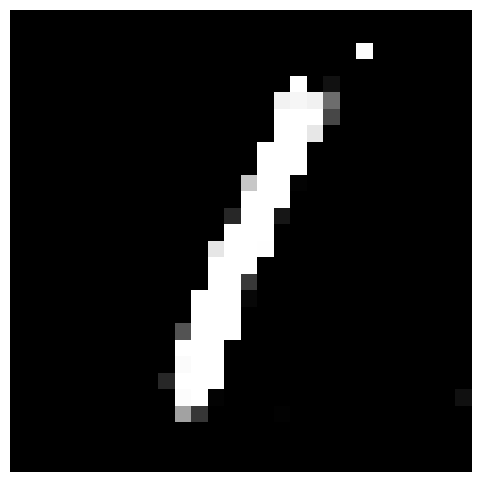

In [10]:
z = torch.randn(1, latent_vector_size)
sample_images = generator(z).detach().numpy().reshape(-1, 28, 28)

plt.figure(figsize=(6, 6))
for i in range(1):
    plt.subplot(1, 1, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')
plt.show()
